In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk

In [37]:

labels = [2, 5, 10, 20, 40, 50, 85]

f1_macro = []
f1_micro = []
acc = []
x = []
label_dicts = {}
num_new_nodes_per_class = 50
for label in labels:
    results = []
    f1_mi = []
    f1_ma = []
    a = []
    for i in range(1,5):
        file_name = "partition_"+str(i)+"_sampler_Random_label_" + str(label) +"_added"+str(num_new_nodes_per_class)+ ".pk"
        with open(file_name, 'rb') as f:
            result_dict = pk.load(f)
        results.append(result_dict)
        f1_ma.append(result_dict['scores']['f1_macro'])
        f1_mi.append(result_dict['scores']['f1_micro'])
        a.append(result_dict['scores']['acc'])
    f1_macro.append(np.mean(f1_ma))
    f1_micro.append(np.mean(f1_mi))
    acc.append(np.mean(a))
    x.append(result_dict['label_percent'])
    label_dicts[label] = results
        



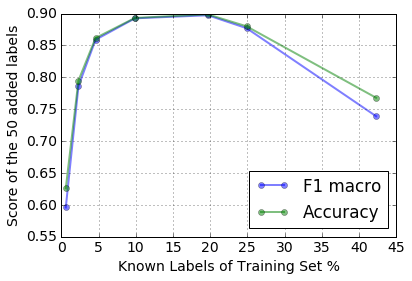

In [38]:
w=2
a =0.5
plt.plot(x,f1_macro,'bo-', alpha= a,linewidth=w,label='F1 macro')
#plt.plot(x,f1_micro,'ko-',  alpha= a,linewidth=w)
plt.plot(x,acc,'go-',  alpha= a,linewidth=w,label='Accuracy')
plt.rcParams.update({'font.size': 14})
plt.xlabel("Known Labels of Training Set %")
plt.ylabel("Score of the "+str(num_new_nodes_per_class)+" added labels")
plt.legend(loc=4)
plt.grid(True)
plt.savefig(str(num_new_nodes_per_class)+".png", dpi=300)

0.6


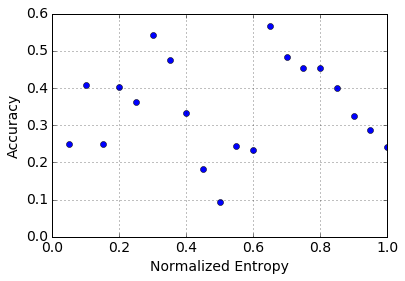

2.3


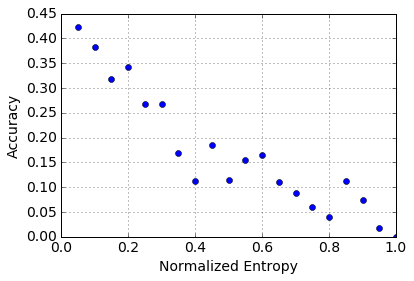

4.6


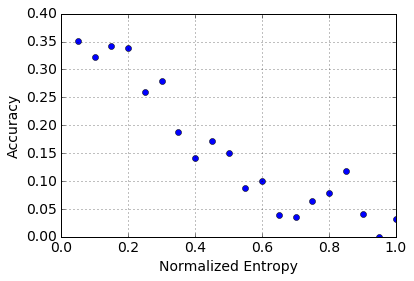

9.3


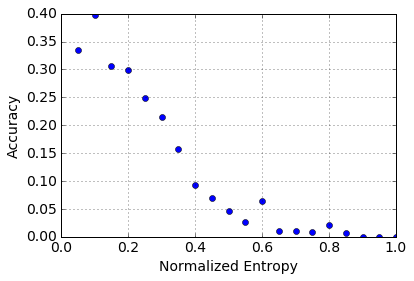

18.5


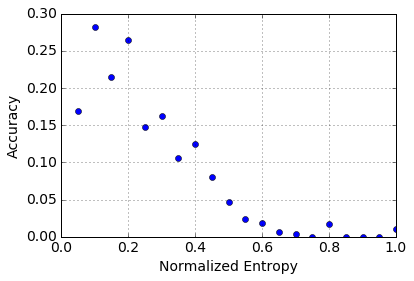

23.2


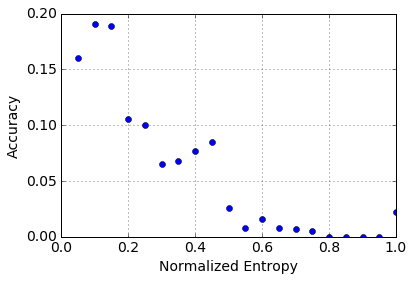

39.4


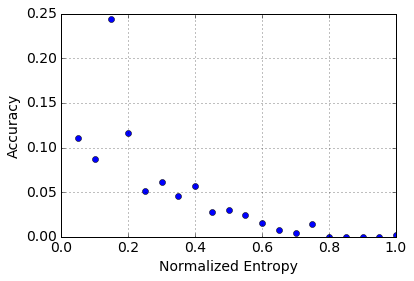

In [39]:
for l in labels:
    print(label_dicts[l][0]['label_percent'])
    # one graph per label
    plot_dict = {}
    for i in range(4):
        for pair in label_dicts[l][i]['normalized_entropy_list']:
            if pair[0] not in plot_dict:
                plot_dict[pair[0]] = [pair[1]]
            else:
                plot_dict[pair[0]].append(pair[1])
    
    x = []
    y = []
    for key, value in plot_dict.items():
        x.append(key)
        y.append(np.mean(value))
    plt.plot(x,y,'o')
   # plt.title("Label " + str(label_dicts[l][0]['label_percent']) +"%")
    plt.xlabel("Normalized Entropy")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
    #plt.savefig("entropy_"+label_dicts[l][0]['label_percent']+".png", dpi=300)
    plt.close()
    

0.6


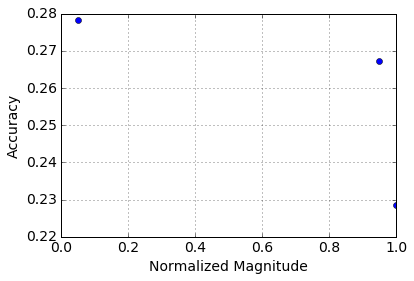

2.3


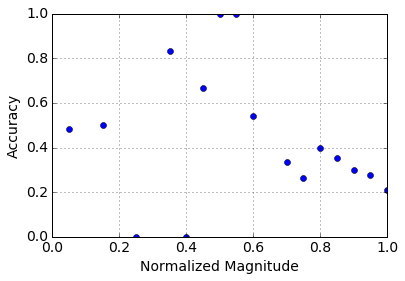

4.6


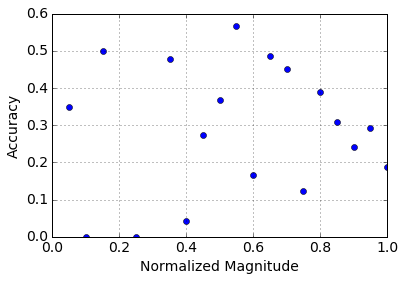

9.3


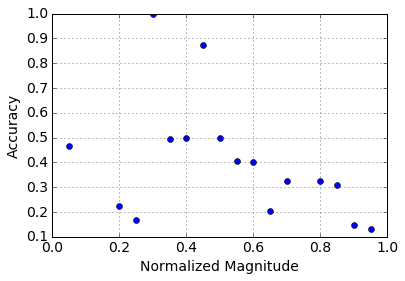

18.5


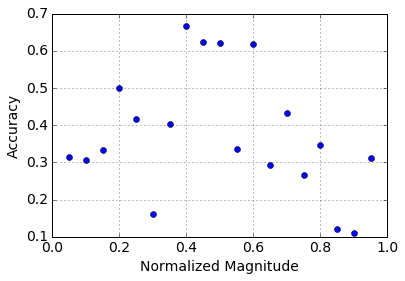

23.2


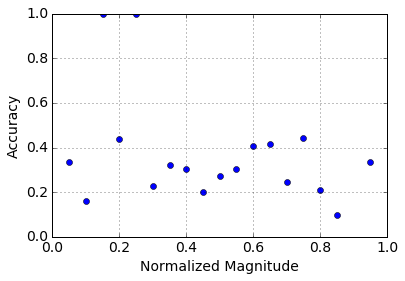

39.4


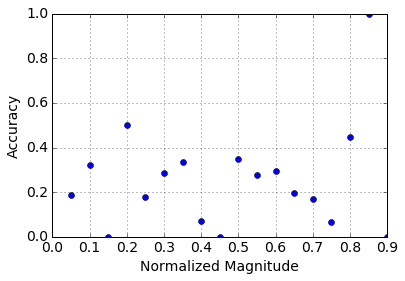

In [41]:
for l in labels:
    print(label_dicts[l][0]['label_percent'])
    # one graph per label
    plot_dict = {}
    for i in range(4):
        for pair in label_dicts[l][i]['magnitude_list']:
            if pair[0] not in plot_dict:
                plot_dict[pair[0]] = [pair[1]]
            else:
                plot_dict[pair[0]].append(pair[1])
    
    x = []
    y = []
    for key, value in plot_dict.items():
        x.append(key)
        y.append(np.mean(value))
    plt.plot(x,y,'o')
    #plt.title("Label " + str(label_dicts[l][0]['label_percent']) +"%")
    plt.xlabel("Normalized Magnitude")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
#     plt.savefig("magnitude_"+label_dicts[l][0]['label_percent']+".png", dpi=300)
    plt.close()
    